In [21]:
####################################################################
###    This is the PYTHON version of program 6.2 from page 197 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### % It is the SIR epidemic model with constant additive noise    #
### added all the various rates.								   #
### Given the difficulties in integrating the dynamics, the user   #
### is prompted for a integration time-step.					   #
####################################################################

In [22]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

*beta is the transmission rate and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.

*ξi a set of six noise terms which are generated as a function of the time step.

*gamma is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infectious period.

*mu is the per capita death rate.

*νN is the birth rate, which is assumed to be constant and equal to μN; therefore preventing extinction of the host population.

*X0 is the initial number or density of susceptible individuals.

*Y0 is the initial number or density of infectious individuals.

*N is the population size -- assumed to be constant.

In [23]:
beta=1.0;
gamma=1/10.0;
mu=1/(50*365.0);
X0=1e5;
Y0=500;
N0=1e6;
Step=1;
ND=MaxTime=5*365.0;
TS=1.0

INPUT0=np.hstack((X0,Y0))

In [24]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((2))
	V = INP     
	Y[0] = (mu*N0 + np.sqrt(mu*N0)*P[0]) - (beta*V[0]*V[1]/N0 \
	+ np.sqrt(beta*V[0]*V[1]/N0)*P[1])	- (mu*V[1] + np.sqrt(mu*V[1])*P[2]);
	Y[1] = (beta*V[0]*V[1]/N0 + np.sqrt(beta*V[0]*V[1]/N0)*P[1]) - \
	(gamma*V[1] + np.sqrt(gamma*V[1])*P[3]) - (mu*V[1] + np.sqrt(mu*V[1])*P[4]);
	return Y   # For odeint

In [25]:
T=np.zeros((int(np.ceil(ND/Step)),1))
RES=np.zeros((int(np.ceil(ND/Step)),2))
INPUT=INPUT0
t=0
loop=0
sqrtStep=np.sqrt(Step)

In [26]:
while t<ND and INPUT[0]>0 and INPUT[1]>0:
	t_start = 0.0; t_end = t_start+Step; t_inc = TS
	t_range = np.arange(t_start, t_end+t_inc, t_inc)
	P=np.random.normal(size=5)/sqrtStep
	PRES = spi.odeint(diff_eqs,INPUT,t_range)
	T[loop]=t=t+Step
	INPUT=PRES[-1]
	RES[loop]=PRES[-1]
	loop += 1

print(RES)

[[ 99998.8389641     506.40795984]
 [100000.66858959    508.53446372]
 [ 99998.65564051    524.55167608]
 ...
 [ 98994.53357281    373.22701848]
 [ 99018.84535501    359.90127422]
 [ 99036.83339972    338.28945245]]


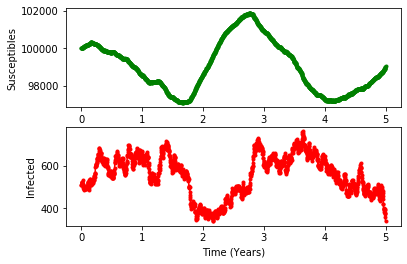

In [27]:
### plotting
pl.subplot(211)
pl.plot(T/365., RES[:,0], '.-g')
pl.xlabel('Time (Years)')
pl.ylabel('Susceptibles')
pl.subplot(212)
pl.plot(T/365., RES[:,1], '.-r')
pl.ylabel('Infected')
pl.xlabel('Time (Years)')

pl.show()